In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [2]:
cdfx = pd.read_csv("./catapult_tempmatch_latency.csv", index_col=0)
vdfx = pd.read_csv("./vivado_tempmatch.csv", index_col=0)
cdfx['throughput'] = vdfx['obj1'].min()*1/cdfx['obj1']
vdfx['throughput'] = vdfx['obj1'].min()*1/vdfx['obj1']
cdfx['ff_inv'] = 1/cdfx['ff']
vdfx['ff_inv'] = 1/vdfx['ff']
cdfx['lut_inv'] = 1/cdfx['lut']
vdfx['lut_inv'] = 1/vdfx['lut']
cdfx['1/obj2'] = cdfx['obj2'].min()*1/cdfx['obj2']
vdfx['1/obj2'] = cdfx['obj2'].min()*1/vdfx['obj2']
cdfx['clbUtil'] = cdfx['obj2']/147780
vdfx['clbUtil'] = vdfx['obj2']/147780
#cdfx['mem_partition_size1'] = cdfx['knob_array_part1']
#vdfx['mem_partition_size1'] = pd.to_numeric(512/(vdfx['knob_array_partition1']), downcast='integer')
#cdfx['mem_partition_size2'] = cdfx['knob_array_part2']
#vdfx['mem_partition_size2'] = pd.to_numeric(vdfx['knob_UNROLL_F']/(vdfx['knob_array_partition2']), downcast='integer')
# dropping columns
cdfx = cdfx.drop(columns=['knob_I_B'])
cdfx = cdfx.drop(columns=['tmpsize'])
cdfx = cdfx.drop(columns=['size'])
#vdfx = vdfx.drop(columns=['knob_array_partition1'])
#vdfx = vdfx.drop(columns=['knob_array_partition2'])

In [3]:
print(cdfx.count())
cdfx.head()

knob_tmpdim           9216
knob_indim            9216
knob_UNROLL_FACTOR    9216
knob_UNROLL_LOOP1     9216
knob_UNROLL_LOOP2     9216
knob_UNROLL_LOOP3     9216
knob_UNROLL_LOOP4     9216
obj1                  9216
obj2                  9216
lut                   9216
ff                    9216
dsp                   9216
bram                  9216
throughput            9216
ff_inv                9216
lut_inv               9216
1/obj2                9216
clbUtil               9216
dtype: int64


,knob_tmpdim,knob_indim,knob_UNROLL_FACTOR,knob_UNROLL_LOOP1,knob_UNROLL_LOOP2,knob_UNROLL_LOOP3,knob_UNROLL_LOOP4,obj1,obj2,lut,ff,dsp,bram,throughput,ff_inv,lut_inv,1/obj2,clbUtil
n,,,,,,,,,,,,,,,,,,
0,5,100,1,1,1,1,1,1.839540,152,838,204,0,10,0.007067,0.004902,0.001193,0.506579,0.001029
1,5,100,1,1,1,1,2,1.530371,182,871,208,0,10,0.008495,0.004808,0.001148,0.423077,0.001232
2,5,100,1,1,1,1,3,1.719198,173,895,212,0,10,0.007562,0.004717,0.001117,0.445087,0.001171
3,5,100,1,1,1,1,4,2.037101,188,851,213,0,10,0.006382,0.004695,0.001175,0.409574,0.001272
4,5,100,1,1,1,2,1,1.698066,158,860,190,0,10,0.007656,0.005263,0.001163,0.487342,0.001069


In [4]:
print(vdfx.count())
vdfx.head()

knob_tmpdim           6282
knob_indim            6282
knob_UNROLL_FACTOR    6282
knob_UNROLL_LOOP1     6282
knob_UNROLL_LOOP2     6282
knob_UNROLL_LOOP3     6282
knob_UNROLL_LOOP4     6282
obj1                  6282
obj2                  6282
lut                   6282
ff                    6282
dsp                   6282
bram                  6282
throughput            6282
ff_inv                6282
lut_inv               6282
1/obj2                6282
clbUtil               6282
dtype: int64


,knob_tmpdim,knob_indim,knob_UNROLL_FACTOR,knob_UNROLL_LOOP1,knob_UNROLL_LOOP2,knob_UNROLL_LOOP3,knob_UNROLL_LOOP4,obj1,obj2,lut,ff,dsp,bram,throughput,ff_inv,lut_inv,1/obj2,clbUtil
n,,,,,,,,,,,,,,,,,,
0,5,100,1,1,1,1,1,0.016,96,366,498,0,1,0.812500,0.002008,0.002732,0.802083,0.000650
1,5,100,1,1,1,1,2,0.016,102,389,508,0,1,0.812500,0.001969,0.002571,0.754902,0.000690
2,5,100,1,1,1,1,3,0.024,123,451,618,4,1,0.541667,0.001618,0.002217,0.626016,0.000832
3,5,100,1,1,1,1,4,0.017,109,434,517,0,1,0.764706,0.001934,0.002304,0.706422,0.000738
4,5,100,1,1,1,2,1,0.017,120,495,560,0,1,0.764706,0.001786,0.002020,0.641667,0.000812


In [5]:
cmn_col = np.intersect1d(cdfx.columns, vdfx.columns)

Text(0, 0.5, 'CLB Resources (Normalized 1/CLB)')

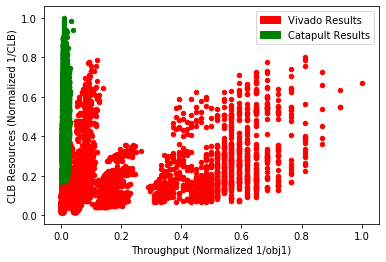

In [6]:
ax1 = vdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='r')
ax = cdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Vivado Results')
green_data = mpatches.Patch(color='green', label='Catapult Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')

Text(0, 0.5, 'Normalized 1/CLB (1/obj2)')

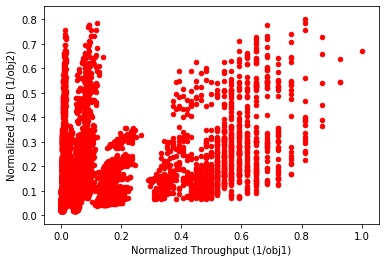

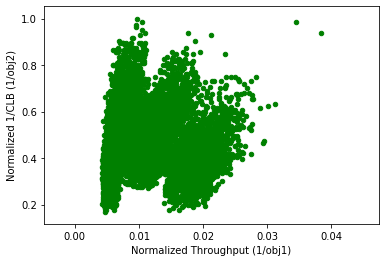

In [7]:
ax1 = vdfx.plot(y='1/obj2', x='throughput', kind='scatter', c='r')
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
ax = cdfx.plot(y='1/obj2', x='throughput', kind='scatter', c='g')
#ax1.set_ylim(0,0.001)
#ax1.set_xlim(0,1)
#ax.set_ylim(0.2, 0.6)
#ax.set_xlim(0,0.0000004)
#red_data = mpatches.Patch(color='green', label='Vivado Results')
#green_data = mpatches.Patch(color='red', label='Catapult Results')
#plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')

In [8]:
print("~~~~~~~~~~~ Catapult Averages ~~~~~~~~~~~~\n")
print(cdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\n~~~~~~~~~~~ Vivado Averages ~~~~~~~~~~~~\n")
print(vdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~ Catapult Averages ~~~~~~~~~~~~

knob_tmpdim            11.666667
knob_indim            233.333333
knob_UNROLL_FACTOR      2.500000
knob_UNROLL_LOOP1       2.500000
knob_UNROLL_LOOP2       2.500000
knob_UNROLL_LOOP3       2.500000
knob_UNROLL_LOOP4       2.500000
obj1                    1.441294
obj2                  179.533095
lut                   993.237196
ff                    233.334852
dsp                     0.000000
bram                    6.000000
throughput              0.011329
ff_inv                  0.004397
lut_inv                 0.001096
1/obj2                  0.463284
clbUtil                 0.001215
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~ Vivado Averages ~~~~~~~~~~~~

knob_tmpdim              8.723337
knob_indim             233.476600
knob_UNROLL_FACTOR       2.357211
knob_UNROLL_LOOP1        2.280643
knob_UNROLL_LOOP2        2.494429
knob_UNROLL_LOOP3        2.455428
knob_UNROLL_LOOP4        2.497771
obj1                   

In [9]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, 
                 on=
                 [
                    'knob_tmpdim',
                    'knob_indim',        
                    'knob_UNROLL_FACTOR',
                    'knob_UNROLL_LOOP1', 
                    'knob_UNROLL_LOOP2', 
                    'knob_UNROLL_LOOP3', 
                    'knob_UNROLL_LOOP4' 
                 ], how='inner')
cv_df.count()

knob_tmpdim           6282
knob_indim            6282
knob_UNROLL_FACTOR    6282
knob_UNROLL_LOOP1     6282
knob_UNROLL_LOOP2     6282
knob_UNROLL_LOOP3     6282
knob_UNROLL_LOOP4     6282
obj1_x                6282
obj2_x                6282
lut_x                 6282
ff_x                  6282
dsp_x                 6282
bram_x                6282
throughput_x          6282
ff_inv_x              6282
lut_inv_x             6282
1/obj2_x              6282
clbUtil_x             6282
obj1_y                6282
obj2_y                6282
lut_y                 6282
ff_y                  6282
dsp_y                 6282
bram_y                6282
throughput_y          6282
ff_inv_y              6282
lut_inv_y             6282
1/obj2_y              6282
clbUtil_y             6282
dtype: int64

(0, 1)

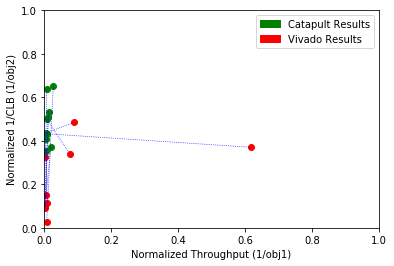

In [10]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/obj2_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['1/obj2_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0, 1)the CPU needs to perform safety and access control checks to see whether you're actually entitled to access that specific memory area. Onc
plt.xlim(0, 1)

(0, 0.003)

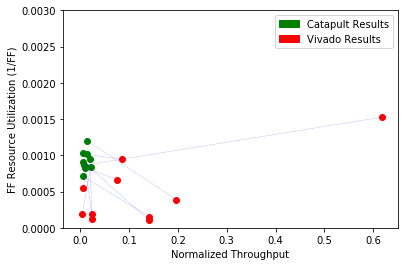

In [11]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample.lut_inv_x, x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample.lut_inv_y, x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['lut_inv_x'], row['lut_inv_y']],'b:',linewidth=0.3)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput')
plt.ylabel('FF Resource Utilization (1/FF)')
plt.ylim(0, 0.003)